<a href="https://colab.research.google.com/github/Kozhedu/MDS-UFU-DL-TEST/blob/main/Kozhedub_GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Загрузка данных

In [ ]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#↓ добавился восклицательный знак, потому что это колаб
!kaggle competitions download -c mds-ufu-dl-test

mds-ufu-dl-test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#↓ "распакуй" + имя архива
!unzip mds-ufu-dl-test.zip

Archive:  mds-ufu-dl-test.zip
replace fmnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train=pd.read_csv("fmnist_train.csv")
test=pd.read_csv("fmnist_test.csv")

In [ ]:
train.isnull().sum().sum()

424

In [ ]:
train = train.fillna(0)

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
test.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=train['label'].to_numpy()

In [ ]:
X = train.iloc[:, 1:785].to_numpy()

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=15, shuffle=True, stratify=y)

In [ ]:
val = test.iloc[:, 0:784].to_numpy()

In [ ]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 50
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [ ]:
# Подготавливаем данные.
train_x = train_x.reshape(train_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
test_x = test_x.reshape(test_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
val_x =val.reshape(val.shape[0],IMG_WIDTH, IMG_HEIGHT, 1)

In [ ]:
train_x.shape

(13632, 28, 28, 1)

In [ ]:
test_x.shape

(3408, 28, 28, 1)

In [ ]:
val_x.shape

(10000, 28, 28, 1)

In [ ]:
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
# Нормализуем данные (0-255 -> 0-1.0).
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
val_x = val_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255
val_x = val_x / 255

In [ ]:
target_train = tf.keras.utils.to_categorical(train_y, NUM_CLASSES)

In [ ]:
target_test = tf.keras.utils.to_categorical(test_y, NUM_CLASSES)

(28, 28, 1)


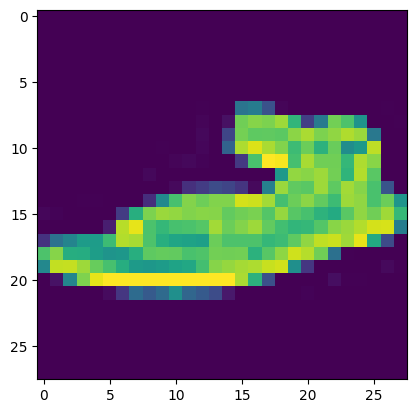

In [ ]:
plt.imshow(val_x[30])
print(val_x[0].shape)

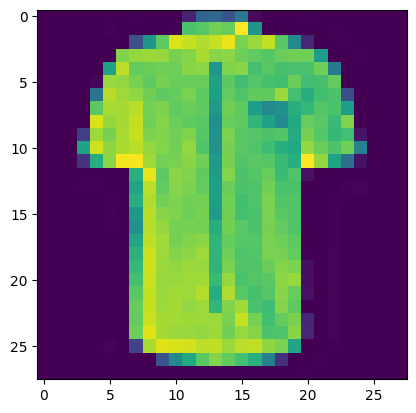

In [ ]:
plt.imshow(train_x[2000].reshape(28, 28))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#2. Обучение

https://www.tensorflow.org/tutorials/keras/classification?hl=ru

In [ ]:
#создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
# И обучаем её.
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model_history = model.fit(
    train_x,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/50
44/44 [==============================] - 16s 344ms/step - loss: 0.9516 - accuracy: 0.6824 - val_loss: 0.6039 - val_accuracy: 0.7730
Epoch 2/50
44/44 [==============================] - 9s 215ms/step - loss: 0.5480 - accuracy: 0.8009 - val_loss: 0.5096 - val_accuracy: 0.8152
Epoch 3/50
44/44 [==============================] - 9s 196ms/step - loss: 0.4850 - accuracy: 0.8259 - val_loss: 0.4714 - val_accuracy: 0.8265
Epoch 4/50
44/44 [==============================] - 9s 197ms/step - loss: 0.4364 - accuracy: 0.8459 - val_loss: 0.4148 - val_accuracy: 0.8596
Epoch 5/50
44/44 [==============================] - 9s 217ms/step - loss: 0.4021 - accuracy: 0.8565 - val_loss: 0.4018 - val_accuracy: 0.8614
Epoch 6/50
44/44 [==============================] - 9s 201ms/step - loss: 0.3845 - accuracy: 0.8635 - val_loss: 0.3833 - val_accuracy: 0.8665
Epoch 7/50
44/44 [==============================] - 9s 192ms/step - loss: 0.3638 - accuracy: 0.8691 - val_loss: 0.3643 - val_accuracy: 0.8739
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(test_x,  target_test, verbose=2)

print('\nTest accuracy:', test_acc)

107/107 - 1s - loss: 0.4218 - accuracy: 0.8906 - 1s/epoch - 10ms/step

Test accuracy: 0.8905516266822815


In [ ]:
prediction = model.predict(val_x)
prediction.shape

313/313 [==============================] - 4s 13ms/step


(10000, 10)

In [ ]:
category=[]
for i in prediction:
    category.append(np.argmax(i))

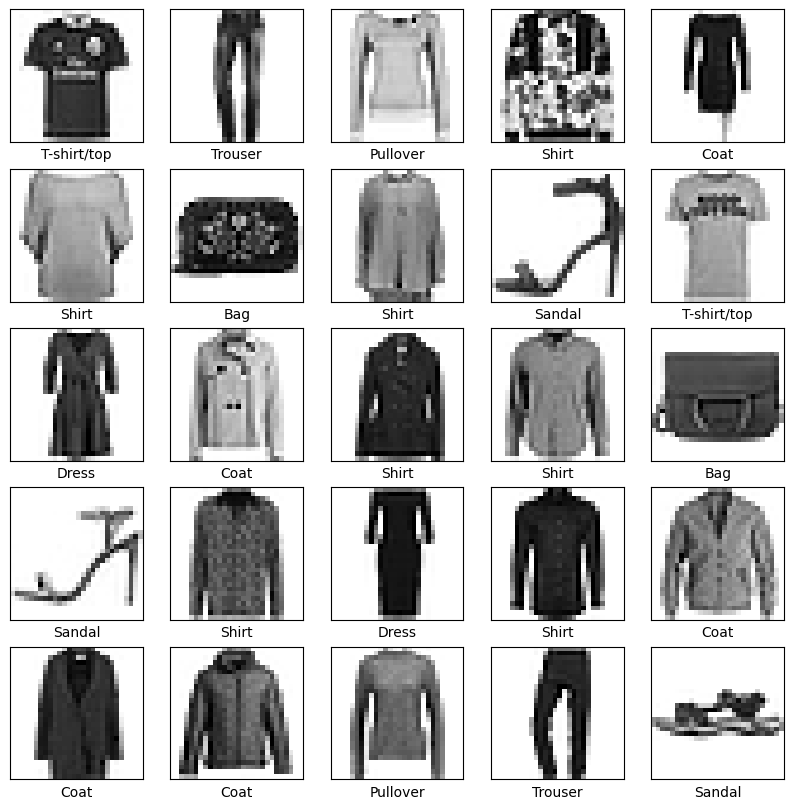

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[category[i]])
plt.show()

In [ ]:
submission = {
    'Id': list(test.Id.values),
    'Category': category
}
solution = pd.DataFrame(submission)
solution.to_csv('submission_my.csv',index=False)

In [ ]:
!kaggle competitions submit -c mds-ufu-dl-test -f submission_my.csv -m "Message" 

100% 67.3k/67.3k [00:00<00:00, 329kB/s]
Successfully submitted to [MDS-UFU-DL-TEST] Построение классификатора